# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [63]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [64]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [65]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [66]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


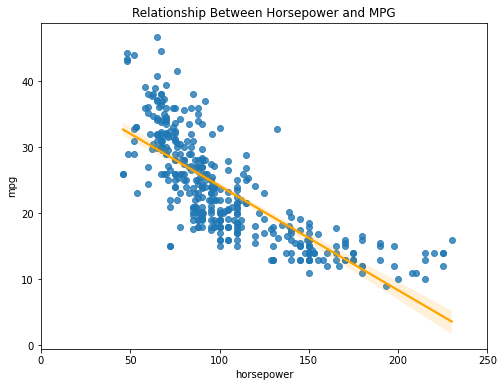

In [67]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

#### Answer: 

- the graph above is showing us as we change the slope of the best-fit line, keeping the y-intercept constant, how the residual sum of squares (i.e. our error) changes 
- this graph is showing the process of gradient descent
- from this graph it looks like the slope that minimizes the RSS for the best-fit line would be at approximately -0.157ish
- Optimal weight with lowest error


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

#### Answer: 

- It would take steps towards the minimum of the curve. 
- Each step taken is proportional to the derivative at that point
- Each step therefore gets smaller as it got closer to the minimum

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

#### Answer: 

- Step size is the size of the step taken towards the minimum when talking about gradient descent.
- The learning rate is the proportion by which we multiply the partial derivative at that point. 
- This then makes the steps proportional to the partial derivative, and ensures that they will not be too large or small

- step size captures amount to change coeff as it tries to minimize error term
- learning rate determines how large those steps are to start


# REVIEW LOG REG THEORY
## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

#### Answer: 

- A logistic regression model is used for classications
- A logistic regression model gives you log odds of the class, which are translated into probabilities
- A linear regression is used to predict continuous variables. A linear regression has a range of values that it can give as an output, 
- logistic regression is limited to 0 through 1 for probability due to sigmoid function
- I believe it is a parametric model as it does need the mean and std devs of the parameters to make predictions
    - Parametric -- has assumptions about how distribution is shaped, have a finite number of parameters basic logistic regression and linear regression are parametric
    - Non-parametric -- infinite number of parameters you have to find the weight for more data leads to more parameters decision tree -- length of tree is not set


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

#### Answer: 

- Decision trees are more useful if the data were to require a lot of preprocessing that we do not have the time for
- Log reg not prone to overfitting

## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [68]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [69]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [70]:
# call_on_students(1)

In [71]:
# Train-test split
# Set test_size=0.33 and random_state=42

X=mpg_class.drop('target',axis=1)
y=mpg_class['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [72]:
# Scale the data
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [73]:
X_train_scaled

array([[-0.88631438, -0.82964316, -0.46684422, ...,  1.0948266 ,
         1.620831  , -0.68648327],
       [-0.88631438, -0.8773238 , -0.51883707, ...,  0.01094293,
        -0.04231935,  0.54542507],
       [-0.88631438, -0.743818  ,  0.15707001, ...,  0.01094293,
        -0.87389452,  0.54542507],
       ...,
       [-0.88631438, -0.45773416, -0.54483349, ...,  0.74518671,
         0.5120641 , -0.68648327],
       [-0.88631438, -0.96314895, -1.06476201, ...,  1.82907038,
         1.34363928, -0.68648327],
       [ 1.42427634,  1.91676177,  1.1449342 , ..., -0.51351691,
        -0.87389452, -0.68648327]])

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [74]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [75]:
# Code to explore
print('Value counts: \n',y_train.value_counts(),
      '\n \n'
      
      'Proportions: \n',y_train.value_counts(normalize=True),'\n',)

Value counts: 
 0    195
1     67
Name: target, dtype: int64 
 
Proportions: 
 0    0.744275
1    0.255725
Name: target, dtype: float64 



#### Answer:

- Looks like the target column is just about 75% class 0 and only 25% class 1


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- A model-less baseline would be one that just selects class 0


#### Part 3: How accurate would that baseline be on test data?


In [76]:
# Code to find the answer
y_test.value_counts(normalize=True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Answer:

- 75% of the time it would pick class 0 correctly


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [77]:
# call_on_students(1)

#### Answer:

- Maybe consider using SMOTE on the training data as there is a bit of an imbalance in the classes
- Stratify!
- Logistic regression also assumes that 0.5 is the threshold we want to as the threshold for distinguishing classes, so we may want to consider looking to see if there is a more optimal value


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [78]:
# call_on_students(1)

In [79]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42,max_iter=1000)
logreg.fit(X_train_scaled,y_train)


LogisticRegression(max_iter=1000, random_state=42)

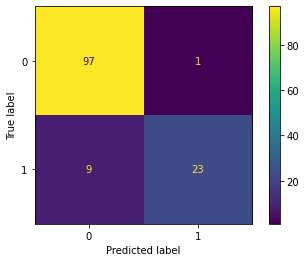

In [80]:
# Plot a confusion matrix on the test data
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg,X_test_scaled,y_test)

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [81]:
# call_on_students(1)

In [82]:
# Accuracy
preds = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test,preds)
accuracy

0.9230769230769231

In [83]:
# Precision
precision = precision_score(y_test,preds)
precision

0.9583333333333334

In [84]:
# Recall
recall = recall_score(y_test,preds)
recall

0.71875

In [85]:
# F1-Score
f1 = f1_score(y_test,preds)
f1

0.8214285714285714

In [86]:
from sklearn.metrics import log_loss
log_loss(y_test,probs)

0.17246330647509928

# REVIEW, ESPECIALLY FUNCTIONS
### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [87]:
# call_on_students(1)

In [88]:
# Calculate roc-auc
from sklearn.metrics import auc,roc_auc_score,roc_curve
probs = logreg.predict_proba(X_test_scaled)
# Calculate the fpr, tpr, and thresholds for the training set
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1])
print(auc(fpr,tpr))
print(roc_auc_score(y_test, probs[:,1]))

0.9811862244897959
0.9811862244897959


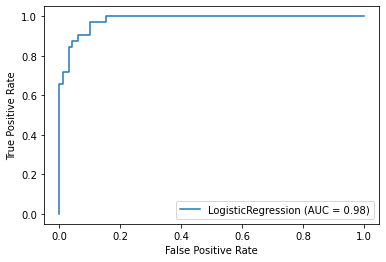

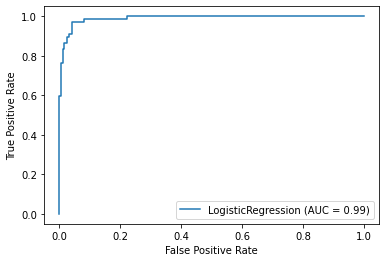

In [89]:
# Plot the ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(logreg, X_test_scaled, y_test)
plot_roc_curve(logreg, X_train_scaled, y_train);

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [90]:
# call_on_students(1)

#### Answer:

- Our model looks like it is doing very well, we are almost as close as you can get to being a perfect classifier
- The AUC score is almost one, 0.98, and the ROC curve is hugging the top left of the graph


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [91]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

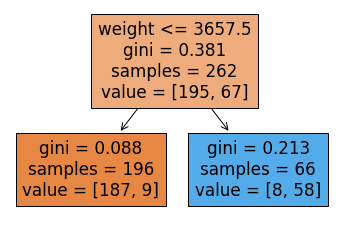

In [92]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

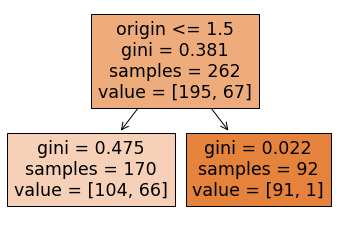

In [93]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

# REVIEW
### 13) Which of these trees does a better job splitting the data? How can you tell?

In [94]:
# call_on_students(1)

#### Answer:

- The first tree definitely does a better job splitting the data
    - For one, the gini impurity goes down for both nodes where as in the second it increases in one. of them
    - It looks like many more are correctly classified in the first node as well.
    - The second model looks like it incorrectly said yes to class 1 based on the feature, leading to the gini being almost at its max.


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [95]:
# call_on_students(1)

In [96]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier(random_state=42)

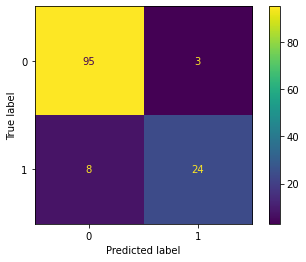

In [97]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt,X_test_scaled,y_test)

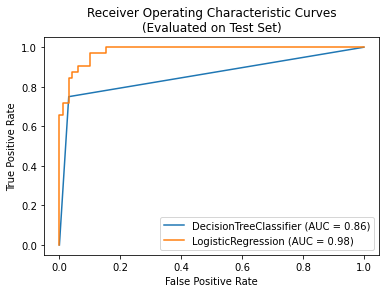

In [98]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test_scaled, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [99]:
# call_on_students(1)

#### Answer:

- It looks like the logistic regression model is much better than the decision tree model as the AUC is always higher for the logreg, which also implies that the graph for logreg is hugging the top left more.
